# Week 12 Homework

# Question 1: In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

A: Machine Learning involves building computer models that allow to the model to discover patterns in the data or make predictions based on the data without being explicitly programmed to do so.  Machine Learning models should be used to see relationships between variables in data and draw causal insights, understand patterns in data, and to use the data to predict future events.  However, there are some cases when machine learning is a better choice than others.  It should only be used once a company has lots of reliable, accessible data that has been cleaned and quality controlled (preprocessed). Unreliable data will give unreliable results from the ML model.  Additionally, the data should be thoroughly studied, and trends and distributions should be understood by the company before building any models.  Machine learning models should be used for large datasets that have plenty of data available for training the model (for supervised learning).  The company should also do a cost-benefit analysis of building a ML model.  The model should only be built if there are actionable changes the company can make based on the results of the model that will save more money than the cost required to build the ML model.   Additionally, a model should not be built if simpler approaches that will take less time can be applied to answer the research question. Machine learning models will only give relationships or make predictions based on the data, but do not try and explain why these relationships exist.  So, depending on what information you need for the project, you may not only be able to rely on Machine Learning techniques. 

# Question 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.  

Steps for preprocessing the data.

1. Cleaning up the data by removing the null values
2. Cleaning up the dashes and odd characters. Also handle missing data and remove extreme outliers.
3. One-Hot encoding (changing categorical to values 0 or 1).
4. Convert categorical values to numerical (There are other types of encoding other than one-hot encoding). Different for nominal and ordinal variables.
5. Standardization/normalization (This allows for comparison of different datasets that are on different scales. Want to scale them so that standard deviation is one for both datasets.) Need to standardize your training and your test datasets.
6. Deal with multicollinearity (can be caused by one-hot encoding). Can drop a column if it is directly correlated with another column. Ex. Blue pans vs. Green pans don't need both columns if only blue and green pans are made. If it is green, it is not blue.

In [1]:
import pandas as pd
import numpy as np

In [2]:
loans_df = pd.read_csv("../week_12/loans_full_schema.csv")
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


# Step 1: Clean Up Data By Removing Null Values

In [3]:
#See how many non-null values are in each column
loans_df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [4]:
#remove columns with mostly missing data: months_since_90d_late, months_since_last_delinq, annual income joint, verification income joint, debt_to_income_joint
#We can do this by using dropna and setting a threshold so that columns with more than that number missing will be dropped. 

loans_df.dropna(axis=1, thresh=5000, inplace=True)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [5]:
#For the remaining columns with missing values, use imputation to substitute in values for the missing ones. 
#The function below from sklearn imputes the missing values with the mean of the column values for that column.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(loans_df[['emp_length']])
loans_df['emp_length'] = imputer.transform(loans_df[['emp_length']])
imputer = imputer.fit(loans_df[['months_since_last_credit_inquiry']])
loans_df['months_since_last_credit_inquiry'] = imputer.transform(loans_df[['months_since_last_credit_inquiry']])
imputer = imputer.fit(loans_df[['num_accounts_120d_past_due']])
loans_df['num_accounts_120d_past_due'] = imputer.transform(loans_df[['num_accounts_120d_past_due']])
imputer = imputer.fit(loans_df[['debt_to_income']])
loans_df['debt_to_income'] = imputer.transform(loans_df[['debt_to_income']])

In [6]:
#Check for rows with any remaining missing values left. 
loans_df.isnull().sum()

emp_title                           833
emp_length                            0
state                                 0
homeownership                         0
annual_income                         0
verified_income                       0
debt_to_income                        0
delinq_2y                             0
earliest_credit_line                  0
inquiries_last_12m                    0
total_credit_lines                    0
open_credit_lines                     0
total_credit_limit                    0
total_credit_utilized                 0
num_collections_last_12m              0
num_historical_failed_to_pay          0
current_accounts_delinq               0
total_collection_amount_ever          0
current_installment_accounts          0
accounts_opened_24m                   0
months_since_last_credit_inquiry      0
num_satisfactory_accounts             0
num_accounts_120d_past_due            0
num_accounts_30d_past_due             0
num_active_debit_accounts             0


In [7]:
#Count the number of unique values in the column
loans_df['emp_title'].nunique()
#Drop the employment title column because it is not quantitative and probably not helpful for our analysis since there are so many different job titles. 
loans_df.drop(columns=['emp_title'], inplace=True)

In [8]:
#make sure there are no more missing values
loans_df.isnull().sum()

emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc_accounts               0
num_open_cc_

# Step 2: Standardize or Normalize Dataset

In [9]:
#get numeric column names
num_cols = loans_df._get_numeric_data().columns
print(num_cols)
numeric_col_names = num_cols.tolist()

Index(['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_120d_past_due', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'balance',
       'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fees'],
      dtype='object')


In [10]:
#Standardize the dataset using StandardScaler and save as standardized df
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
standardized_cols = std.fit_transform(loans_df[num_cols])
standardized_df = pd.DataFrame(standardized_cols)
standardized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.825666,0.166502,-0.086626,-0.315962,-0.037203,1.698227,0.447663,-0.239333,-0.601264,-0.228997,...,-0.367190,1.129752,1.516684,0.328439,0.598041,1.260223,-0.125038,-0.234361,0.803250,-0.065908
1,1.146709,-0.605925,-0.952096,-0.315962,-0.678630,-0.402603,0.615944,0.442332,-0.825091,-0.871239,...,2.598804,-1.102945,-0.659333,0.036489,-1.046902,-0.984292,-0.504067,-0.397975,-0.868306,-0.065908
2,-0.825666,-0.605925,0.122901,-0.315962,0.604224,0.857895,0.700085,-0.239333,-0.849645,-0.653485,...,-0.367190,-1.394166,-0.659333,0.932336,-1.372981,-1.267985,-0.558973,-0.442581,-0.953479,-0.065908
3,-1.389202,-0.760410,-0.610446,-0.315962,0.732510,-0.822769,-1.571716,-1.261830,-0.843212,-0.858635,...,-0.367190,0.508480,-0.659333,-1.141310,0.637589,0.441019,0.206834,0.219425,-0.064791,-0.065908
4,1.146709,-0.683167,2.579180,-0.315962,0.860795,2.118393,-0.057182,0.783165,-0.606360,0.031192,...,-0.367190,0.644383,-0.659333,0.328439,1.053683,0.699638,-0.042846,-0.083569,0.299889,-0.065908


In [11]:
#standardized_df.head()
#standardized_df.describe()

In [12]:
#try using preprocessing package for normalization of data and save as normalized_df
from sklearn import preprocessing
x = loans_df[num_cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.3,0.039130,0.038393,0.0,0.730769,0.206897,0.305882,0.196078,0.020908,0.041134,...,0.000000,0.692308,1.0,0.341787,0.404847,0.675397,0.048026,0.024604,0.240769,0.0
1,1.0,0.017391,0.010744,0.0,0.634615,0.034483,0.329412,0.274510,0.008506,0.004585,...,0.333333,0.102564,0.0,0.284822,0.089065,0.116284,0.011989,0.008716,0.035691,0.0
2,0.3,0.017391,0.045087,0.0,0.826923,0.137931,0.341176,0.196078,0.007145,0.016977,...,0.000000,0.025641,0.0,0.459618,0.026468,0.045616,0.006769,0.004384,0.025242,0.0
3,0.1,0.013043,0.021659,0.0,0.846154,0.000000,0.023529,0.078431,0.007501,0.005302,...,0.000000,0.528205,0.0,0.055014,0.412439,0.471331,0.079579,0.068668,0.134272,0.0
4,1.0,0.015217,0.123558,0.0,0.865385,0.241379,0.235294,0.313725,0.020626,0.055941,...,0.000000,0.564103,0.0,0.341787,0.492317,0.535754,0.055840,0.039246,0.179014,0.0


In [13]:
#normalized_df.head()
#normalized_df.describe()

In [14]:
#Add back the non-numeric columns to the dataframes
#get the names of the non-numeric columns from the original dataset
loans_df.dtypes
numeric_col_names = num_cols.tolist()
#print(numeric_col_names)
normalized_df.columns = numeric_col_names
standardized_df.columns = numeric_col_names

# Step 3: Change Categorical Values to Numerical and Reduce Multicollinearity

In [15]:
#Preprocess the ordinal and nominal categorical variables. Nominal: state, homeownership, verified income, loan_purpose, aaplication_type, issue_month, loan_status, initial_listing_status, disbursement method. 
#Ordinal Categorical variables: grade, sub_grade
#object_col_names = ['state','homeownership','verified_income','loan_purpose','application_type','grade','sub_grade','issue_month','loan_status','initial_listing_status','disbursement_method']

#Start with nominal categorical variables. 
nominal_columns = ['state','homeownership','verified_income','loan_purpose','application_type','issue_month','loan_status','initial_listing_status','disbursement_method']

#Use pd.get_dummies to change categorical values to numerical ones with a value of 1 or 0.  The drop_first=True helps with multicollinearity. (Helps remove the correlation between the set of columns that is created for each variable).
nominal_df = pd.get_dummies(loans_df[nominal_columns],drop_first=True)
nominal_df.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,application_type_joint,issue_month_Jan-2018,issue_month_Mar-2018,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),initial_listing_status_whole,disbursement_method_DirectPay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0


In [16]:
#Now change the ordinal columns

ordinal_columns = ['grade', 'sub_grade']
grade_mapping = {'A':5,'B':4,'C':3,'D':2, 'E': 1, 'F':0}
loans_df['grade'] = loans_df['grade'].map(grade_mapping)
loans_df['grade'].head()
loans_df['sub_grade'].head(-1)
sub_grade_mapping = {'A1': 30, 'A2': 29, 'A3': 28, 'A4': 27, 'A5': 26, 'B1': 25, 'B2': 24, 'B3': 23, 'B4': 22, 'B5': 21, 'C1': 20, 'C2': 19, 'C3': 18, 'C4': 17,'C5': 16, 'D1': 15, 'D2': 14, 'D3': 13, 'D4': 12, 'D5': 11, 'E1': 10, 'E2': 9, 'E3': 8, 'E4': 7, 'E5': 6, 'F1': 5, 'F2': 4, 'F3': 3, 'F4': 2, 'F5': 1}
loans_df['sub_grade'] = loans_df['sub_grade'].map(sub_grade_mapping)
loans_df['sub_grade'].head(-1)

0       18.0
1       20.0
2       15.0
3       28.0
4       18.0
        ... 
9994    23.0
9995    27.0
9996    13.0
9997     9.0
9998    30.0
Name: sub_grade, Length: 9999, dtype: float64

In [42]:
#Append the categorical columns to the final normalized/standardized datasets. 
new_standardized_df = pd.concat([standardized_df, loans_df[ordinal_columns]], axis=1)
new_standardized_df.head()
new_normalized_df = pd.concat([normalized_df, loans_df[ordinal_columns]],axis=1)
new_normalized_df.head()
final_standardized_df = pd.concat([new_standardized_df, nominal_df], axis=1)
final_standardized_df.head()
final_normalized_df = pd.concat([new_normalized_df, nominal_df], axis=1)
final_normalized_df.head()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,application_type_joint,issue_month_Jan-2018,issue_month_Mar-2018,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),initial_listing_status_whole,disbursement_method_DirectPay
0,0.3,0.039130,0.038393,0.0,0.730769,0.206897,0.305882,0.196078,0.020908,0.041134,...,0,0,1,1,0,0,0,0,1,0
1,1.0,0.017391,0.010744,0.0,0.634615,0.034483,0.329412,0.274510,0.008506,0.004585,...,0,0,0,1,0,0,0,0,1,0
2,0.3,0.017391,0.045087,0.0,0.826923,0.137931,0.341176,0.196078,0.007145,0.016977,...,0,0,0,1,0,0,0,0,0,0
3,0.1,0.013043,0.021659,0.0,0.846154,0.000000,0.023529,0.078431,0.007501,0.005302,...,0,1,0,1,0,0,0,0,1,0
4,1.0,0.015217,0.123558,0.0,0.865385,0.241379,0.235294,0.313725,0.020626,0.055941,...,1,0,1,1,0,0,0,0,1,0


In [44]:
#print a list of column names
for col in final_normalized_df.columns:
    print(col)

emp_length
annual_income
debt_to_income
delinq_2y
earliest_credit_line
inquiries_last_12m
total_credit_lines
open_credit_lines
total_credit_limit
total_credit_utilized
num_collections_last_12m
num_historical_failed_to_pay
current_accounts_delinq
total_collection_amount_ever
current_installment_accounts
accounts_opened_24m
months_since_last_credit_inquiry
num_satisfactory_accounts
num_accounts_120d_past_due
num_accounts_30d_past_due
num_active_debit_accounts
total_debit_limit
num_total_cc_accounts
num_open_cc_accounts
num_cc_carrying_balance
num_mort_accounts
account_never_delinq_percent
tax_liens
public_record_bankrupt
loan_amount
term
interest_rate
installment
balance
paid_total
paid_principal
paid_interest
paid_late_fees
grade
sub_grade
state_AL
state_AR
state_AZ
state_CA
state_CO
state_CT
state_DC
state_DE
state_FL
state_GA
state_HI
state_ID
state_IL
state_IN
state_KS
state_KY
state_LA
state_MA
state_MD
state_ME
state_MI
state_MN
state_MO
state_MS
state_MT
state_NC
state_ND
state_NE

# Question 3: Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

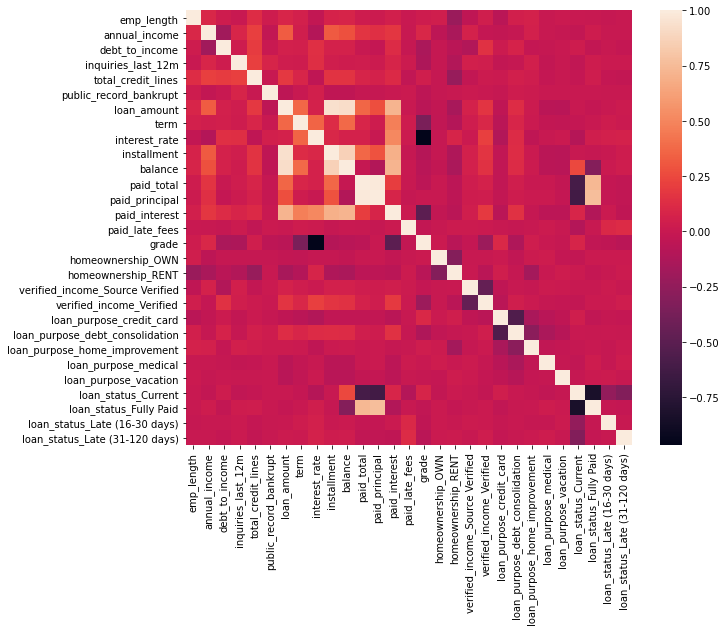

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

#Just look at a few variables from the dataframe otherwise the heatmap is difficult to read. 
test_columns = ['emp_length', 'annual_income', 'debt_to_income', 'inquiries_last_12m', 'total_credit_lines', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'balance', 'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fees', 'grade', 
        'homeownership_OWN', 'homeownership_RENT', 'verified_income_Source Verified', 'verified_income_Verified', 'loan_purpose_credit_card', 'loan_purpose_debt_consolidation', 
        'loan_purpose_home_improvement', 'loan_purpose_medical','loan_purpose_vacation', 'loan_status_Current','loan_status_Fully Paid', 'loan_status_Late (16-30 days)', 'loan_status_Late (31-120 days)']

test_normalized_df = final_normalized_df[test_columns]
NormCorrMatrix = test_normalized_df.corr()
#print(NormCorrMatrix)

plt.figure(figsize=(10,8))
sns.heatmap(NormCorrMatrix)
plt.show()

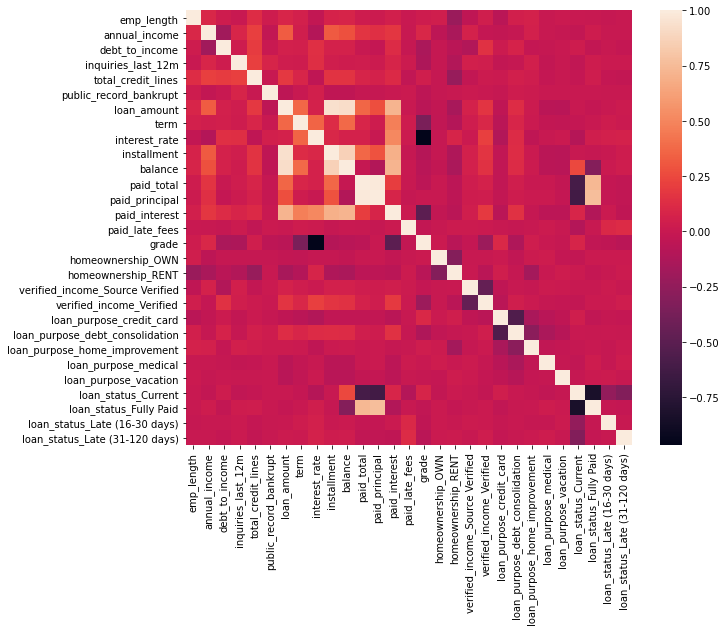

In [59]:
#Also look at the standardized dataset to see if there are any differences.  
test_standardized_df = final_standardized_df[test_columns]
StandardCorrMatrix = test_standardized_df.corr()
#print(StandardCorrMatrix)

plt.figure(figsize=(10,8))
sns.heatmap(StandardCorrMatrix)
plt.show()

# Takeaways from Heatmap

The heatmap shows what the correlation is between variables in the dataset.  This is important if you want to understand what things are important to consider for who is likely to default on there loans (if that is your research question).  In this case, you would want to look at what correlates to loan status Late.  Here we see that loan_status_late correlates strongly to loan_status_current, but this is an example of multicollinearity.  These two variables correlate well, because if you are late, then you are automatically not current, but it doesn't help at all with our research question.  Also, loan_status_late has some correlation (0.25) to paid_late_fees which makes sense because if your loan is late, you will have paid more late fees. But for the variables that I picked for this heatmap, there is not any significant correlation between loan status late and other variables that just change along with loan_status_late (like late fees or loan status paid).  There is a slight negative correlation between loan grade and loan status(so the lower grade is correlated with late status).  

# Question 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

<AxesSubplot:xlabel='loan_amount', ylabel='Count'>

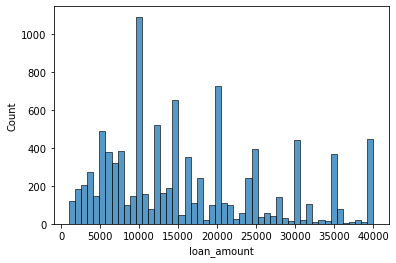

In [72]:
sns.histplot(x='loan_amount', data=loans_df, bins=50)

For the histogram of loan amounts, you see the largest number of loan_amounts being \\$ 10,000 and the second larget loan_amount being \\$ 20,000.  Other more frequently requested loan amounts typically fall at increments of 5,000 or 10,000 dollars. If you have a smaller bin size, you do not see these peaks at the \\$ 5000 and \\$ 10000 dollar increments.  For example, if you do 10 bins, it still looks like the greatest loan amount request is \\$ 10000, but everything after $20,000 looks pretty similar with only about a quarter of the amount of requests for every other bin.  If you choose 50 bins however, you see the pattern of increased requests at around each 5000 dollar mark, but you also see that it is about 1/3 as likely to ask for a \\$ 25K, \\$ 30K, \\$ 35K, or \\$ 40K loan as it is to ask for a \\$ 10K loan. Once you get past \\$25K, it is very rare to ask for a loan not in an increment of \\$5K.

# Question 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
a.	Is there a better way to do this than with a lambda? 
b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 


In [117]:
#Create a function that takes in a state and then assigns a region for that state
def create_region(state):
    try:
        
        if state in ['AL','AZ', 'AR', 'FL','GA','LA', 'MS', 'NV','NM', 'SC','TX', 'UT', 'VA', 'TN', 'NC']:
            region = "South"
        elif state in ['CA', 'WA', 'OR', 'ID', 'AK', 'HI']:
            region = 'Pacific'
        elif state in ['CO', 'MT', 'WY', 'KS', 'NE', 'SD', 'ND', 'OK', 'IA']:
            region = 'Plains'
        elif state in ['MO', 'WI', 'MN', 'KY', 'OH', 'MI', 'IL', 'IN']:
            region = 'Midwest'
        elif state in ['NY', 'PA', 'RI', 'ME', 'DE', 'VT', 'NH', 'CT', 'MD', 'MA', 'NJ', 'WV', 'DC']:
            region = 'Northeast'
        return region
    except:
        print(str(state) + " State abbreviation not found")

#time how long it takes for the lambda function to run using time
from time import time

t1=time()
        
loans_df['region'] = loans_df['state'].apply(lambda x: create_region(x))

t2=time()
elapsed_time=t2-t1
print(elapsed_time)

loans_df.head()



0.019351959228515625


,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific
2,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
3,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific


In [116]:
# try using just a lambda function to do the same thing and time how long it takes

t1=time()

loans_df['region'] = loans_df['state'].apply(lambda x: "South" if x in ['AL','AZ', 'AR', 'FL','GA','LA', 'MS', 'NV','NM', 'SC','TX', 'UT', 'VA', 'TN', 'NC'] else ("Pacific" if x in ['CA', 'WA', 'OR', 'ID', 'AK', 'HI'] else ("Plains" if x in ['CO', 'MT', 'WY', 'KS', 'NE', 'SD', 'ND', 'OK', 'IA'] else ("Midwest" if x in ['MO', 'WI', 'MN', 'KY', 'OH', 'MI', 'IL', 'IN'] else 'Northeast'))))

t2=time()
elapsed_time=t2-t1
print(elapsed_time)

loans_df.head()


0.014512777328491211


,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific
2,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
3,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific


The second method only uses 1 line of code and took slightly less time to run, but the times were very similar for each one (0.0145 s and 0.019 s).  Also, each time I run the code, the time changes and sometimes the first method is faster than the second method.  Personally, I prefer the first method where the lambda calls a function because I think it is more clear than putting everything in one line. 

# Question 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

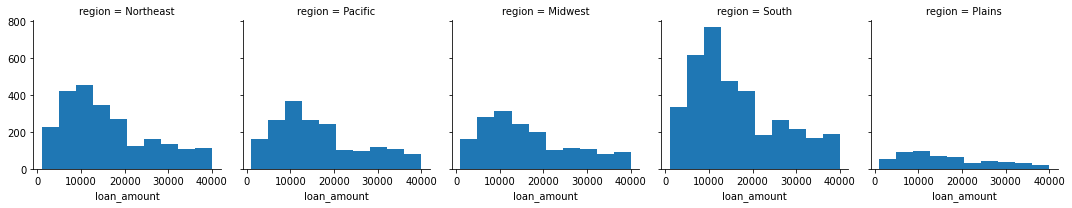

In [107]:
g = sns.FacetGrid(loans_df, col='region', height=3)
g.map(plt.hist, 'loan_amount')

The south region has the most loan request, however, there are also a greater number of states in the South region, including Texas which has a large population.  The Plains region has the lowest loan requests for all amounts.  The frequency distribution is similar for all loan requests with around 10K being the most awarded loan amount and much less loans for all amounts above 20K.  